# Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sklm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston, load_iris
from patsy import dmatrices

# Using a toy dataset: Boston housing price

In [6]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
X = boston.data
print(type(X),X.shape)
y = boston.target
print(type(y),y.shape)
X_name = boston.feature_names
print(type(X_name),X_name.shape,X_name)

<class 'numpy.ndarray'> (506, 13)
<class 'numpy.ndarray'> (506,)
<class 'numpy.ndarray'> (13,) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


1. Loading Iris data

In [29]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
IX = iris.data
Iy = iris.target
print(type(IX), type(Iy), IX. shape, Iy. shape)
IX_name = iris.feature_names
print(type(IX_name),len(IX_name))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (150, 4) (150,)
<class 'list'> 4


# Regression with Boston housing price data

### - Regression with scikit-learn

In [32]:
# Boston dataset preprocessing
Xdf = pd.DataFrame(X, columns= X_name)
ydf = pd.DataFrame(y, columns= ['MEDV'])
bostonDF = pd.concat([Xdf,ydf], axis = 1)
print(bostonDF.shape)
print(bostonDF.head(5))

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [36]:
# Descriptive statistics
bostonDF.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [38]:
# Linear Regression with Scikit-learn
X_data = Xdf[['RM','LSTAT','NOX']]
y_data = ydf['MEDV']

In [39]:
LR_model = sklm.LinearRegression() # LinearRegression function in sklearn linear_m
LR_model.fit(X_data, y_data)
predict = LR_model.predict([[6, 9.67, 0.573]])
print(predict)
print(LR_model.coef_)
print(LR_model.intercept_)
print(LR_model.score(X_data, y_data)) # The coefficient of determination: R**2

[22.89854372]
[ 5.12433498 -0.62287768 -1.84563095]
-0.7666924509023758
0.6389103767491082


### - Regression with Statmodels

In [61]:
# Linear Regression with Statsmodels: Intercept is added automatically
brr = smf.ols("MEDV ~ RM + LSTAT + NOX", data= bostonDF).fit()
print(brr.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.1
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.31e-110
Time:                        21:54:46   Log-Likelihood:                -1582.5
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7667      3.286     -0.233      0.8

In [41]:
# Extracting output data from the above OLS
print(brr.params, brr. rsquared, brr. mse_resid)
print(brr.fittedvalues)

Intercept   -0.766692
RM           5.124335
LSTAT       -0.622878
NOX         -1.845631
dtype: float64 0.6389103767491082 30.72591836271571
0      28.830930
1      25.577960
2      32.675856
3      32.416844
4      31.691693
         ...    
501    25.937274
502    23.880962
503    30.410092
504    28.954245
505    24.167225
Length: 506, dtype: float64


In [42]:
# Another OLS method from Statsmodels: adding constant and preparing y and X data
Xn_data = sm.add_constant(X_data)
b_model1 = sm.OLS(y_data, Xn_data)
brr1 = b_model1.fit()
print(brr1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.1
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.31e-110
Time:                        21:44:43   Log-Likelihood:                -1582.5
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7667      3.286     -0.233      0.8

In [43]:
# Calculating predicted value of y
print(brr1.predict([[1.0, 6.0, 9.67, 0.573]]))

[22.89854372]


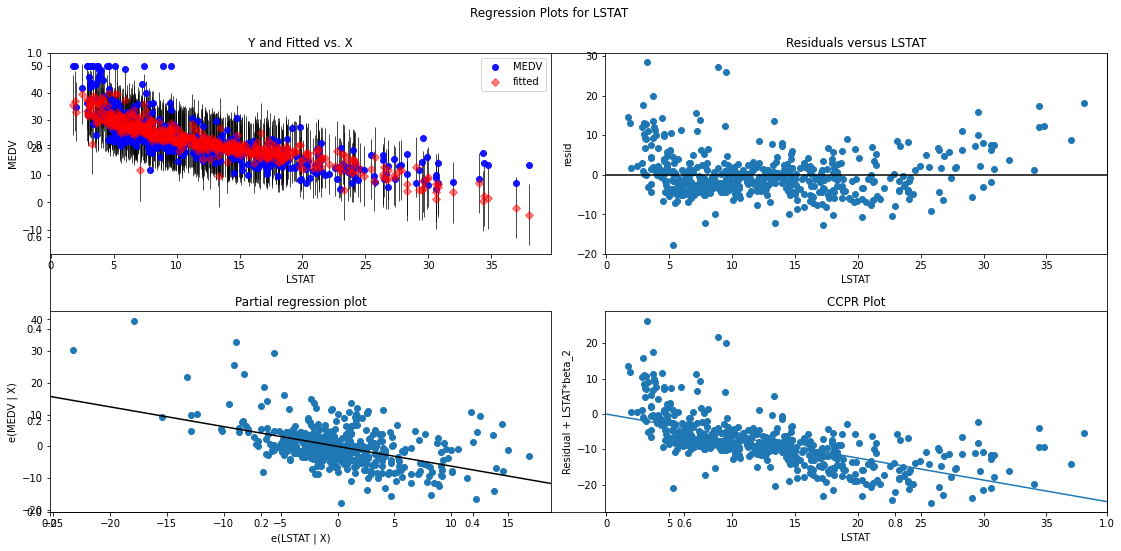

In [44]:
# Drawing graphs with ols results
fig, ax = plt.subplots(figsize= (16,8))
sm. graphics.plot_regress_exog(brr, 'LSTAT', fig= fig)
plt.show()

### - Finding closed solution for regression coefficients

In [45]:
# Converting data frame to numpy array
X = Xn_data.to_numpy()
y = y_data.to_numpy()
print(type(X), X.shape, type(y), y.shape)
print(X.T.shape)

<class 'numpy.ndarray'> (506, 4) <class 'numpy.ndarray'> (506,)
(4, 506)


In [46]:
# Calculating betas directly by matrix manipulations: Inv(XTX)XTy
betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(betas)

[-0.76669245  5.12433498 -0.62287768 -1.84563095]


# Regression with California housing data

In [47]:
# Getting a large dataset embedded in scikit-learn
from sklearn.datasets import fetch_california_housing

In [48]:
# California house prices
cal_housing = fetch_california_housing()
print(cal_housing.DESCR) # Median house value is target variable.

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [49]:
Xdata = cal_housing. data
print(type(Xdata), Xdata.shape)
Xd_name = cal_housing.feature_names
print(type(Xd_name), len(Xd_name))
ydata = cal_housing.target
print(type(ydata),ydata. shape)

<class 'numpy.ndarray'> (20640, 8)
<class 'list'> 8
<class 'numpy.ndarray'> (20640,)


In [50]:
# Data preparation
Xcal = pd.DataFrame(Xdata, columns= Xd_name)
ycal = pd.DataFrame(ydata, columns= ['MHV'])
CalDf = pd.concat([Xcal,ycal], axis= 1)
print(type(CalDf), CalDf. shape)

<class 'pandas.core.frame.DataFrame'> (20640, 9)


In [55]:
# Calculating descriptive statistics
CalDf.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MHV,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [60]:
# OLS with sklearn: use four variables, 'MedInc','HouseAge','AveBedrms','AveOccup'
calX = Xcal[['MedInc','HouseAge','AveBedrms','AveOccup']]
# Use [[4.7, 37.0, 1.10, 3.28]] for prediction
caly = ycal